In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('cart_clean.csv',parse_dates=['date'])

In [5]:
df.head()

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,NaN,3.57
3,2021-03-01,potato,2.0,NaN
4,NaT,tomato,6.0,1.52


In [6]:
# knowing the column datatypes for all column
df.dtypes

date      datetime64[ns]
name              object
amount           float64
price            float64
dtype: object

In [7]:
# knowing datatype for specic column
df['amount'].dtype

dtype('float64')

In the csv file amount has integers, but has one of the values missing.
so in pandas the column becomes float automatically.

Int32
- to have integer data and missing values
- convert column type to Int32


In [8]:
df['amount'].astype('Int32')

0       7
1      12
2    <NA>
3       2
4       6
5       3
6       5
Name: amount, dtype: Int32

isnull function
- identifies NaN, NaT, and python None as missind data
- returns true and false for missing and valid data respectivel
- df.isnull() gives a true/ false for every value in dataframe
- df.isnull().sum() gives the number of null/missing vals in each column
- to get count of null values column-wise df.isnull().sum()
- to check row wise null values use df.isnull().any(axis=1)


- isnull cannot recognise empty string as missing or invalid data.

Steps to find empty strings in columns
- filt = df['col_name'].str.strip() == ''
- Filtering the places where the column has empty strings
- replace it with np.nan (need numpy)
- df.loc[filt,'col_name'] = np.nan

In [13]:
df.isnull().any(axis=1)

0    False
1    False
2     True
3     True
4     True
5    False
6     True
dtype: bool

Bad Values
- out of range data, spelling mistakes are a few examples.
- use value_counts for categorical data
- use groupby and describe to see abnormalities in numerical data
- use pivot method

In [15]:
df1 = pd.read_csv('metric.csv',parse_dates=['time'])

In [16]:
df1.head(10)

,time,name,value
0,2021-07-13 14:36:52.380,mem,2.275172e+08
1,2021-07-13 14:36:52.380,cpu,3.157000e+01
2,2021-07-13 14:36:53.337,mem,2.275192e+08
3,2021-07-13 14:36:53.337,cpu,3.009000e+02
4,2021-07-13 14:36:54.294,mem,2.275157e+08
5,2021-07-13 14:36:54.294,cpu,3.164000e+01
6,2021-07-13 14:36:55.251,mem,2.950000e+02
7,2021-07-13 14:36:55.251,cpu,3.188000e+01
8,2021-07-13 14:36:56.208,mem,2.275313e+08
9,2021-07-13 14:36:56.208,cpu,-3.214000e+01


In [17]:
df1.dtypes

time     datetime64[ns]
name             object
value           float64
dtype: object

In [18]:
# to find abnormalities in categorical data use value_count()
df1['name'].value_counts()

mem    50
cpu    49
CPU     1
Name: name, dtype: int64

- Here cpu and CPU look odd
- step2 is to groupby and describe to get  related stat
- df1.groupby('name').describe()

In [28]:
# we find the row where the name CPU is capitalized
df1[df1['name'] == 'CPU']


,time,name,value
14,2021-07-13 14:36:59.079,CPU,30.4


In [29]:
df1.groupby('name').describe()

value                                                                  \
     count          mean           std     min           25%           50%   
name                                                                         
CPU    1.0  3.040000e+01           NaN   30.40  3.040000e+01  3.040000e+01   
cpu   49.0  3.645633e+01  3.977927e+01  -32.14  2.956000e+01  3.157000e+01   
mem   50.0  2.229711e+08  3.217637e+07  295.00  2.275070e+08  2.275188e+08   

                                 
               75%          max  
name                             
CPU   3.040000e+01         30.4  
cpu   3.507000e+01        300.9  
mem   2.275342e+08  227556054.0

In [32]:
# we can also remove data where the value is negative.
# check the query method
df1.query('name == "cpu" & (value< 0)')

,time,name,value
9,2021-07-13 14:36:56.208,cpu,-32.14


In [35]:
df1[(df1['name'] == 'cpu') & (df1['value'] < 0)]
# same as above

,time,name,value
9,2021-07-13 14:36:56.208,cpu,-32.14


array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

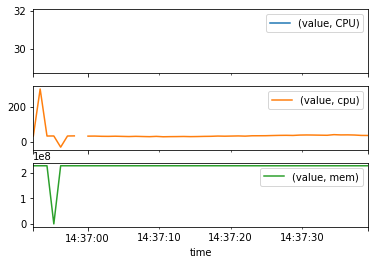

In [37]:
# making pivot table
pd.pivot(df1,index='time',columns='name').plot(subplots=True)

# each column value of pivot table : mem,CPU, and cpu are plotted against the 

Use Z-Score to eliminate bad data.
- we do it for data with name == mem (memory)
- step 1 filter data
- calculate z-score
- get the rows in filtered data where z-score > 2


In [40]:
# we want the value column where name equals mem (filtering)
mem = df1[ df1['name'] == 'mem']['value']
mem.head()

0    227517194.0
2    227519176.0
4    227515712.0
6          295.0
8    227531324.0
Name: value, dtype: float64

In [48]:
# z-score calculation
zs = ((mem - mem.mean())/mem.std()) 


In [49]:
zs.head()

0    0.141285
2    0.141347
4    0.141239
6   -6.929645
8    0.141724
Name: value, dtype: float64

In [50]:
# filtering the bad z-scores
# we want corresponding values, so we go for mem series
bad_z = mem[zs.abs() > 2]

In [52]:
# now we get the rows in df1
df1.loc[bad_z.index]

,time,name,value
6,2021-07-13 14:36:55.251,mem,295.0


In [53]:
# Refer outlier detection with scikit.
# pydantic, marshmallow, pandera for data validation

Handling Duplicate data
- df.duplicated() returns true/false for every row
- it is possible to get duplicate values for a list of columns
- eg: df.duplicated(['name','date'])

In [57]:
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,NaN,3.57
3,2021-03-01,potato,2.0,NaN
4,NaT,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,NaN,5.0,3.68


In [58]:
df.duplicated(['name'])

0    False
1    False
2    False
3    False
4    False
5     True
6    False
dtype: bool

Schema Validation
- similar to adding constraints on table in SQL
- use libraries like pydantic, marshmallow, pandera for data validation
- use PyArrow lib for rwd/write to disk
- hashlib and zlib for retriving and validating digital signatures of files.


In [59]:
dfs = pd.read_csv('Ships.csv')

In [60]:
dfs

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN


In [61]:
# use pandera for data validation
import pandera as pa
# use pip install 

ModuleNotFoundError: No module named 'pandera'

In [62]:
import pandera as pa

In [64]:
schema = pa.DataFrameSchema({
    'name':pa.Column(pa.String),
    'lat':pa.Column(pa.Float),
    'lng':pa.Column(pa.Float) 
    
})

In [65]:
schema.validate(dfs)
#validation fails because by default the column values are not null

SchemaError: non-nullable series 'lat' contains null values:
3   NaN
Name: lat, dtype: float64

In [66]:
schema = pa.DataFrameSchema({
    'name':pa.Column(pa.String),
    'lat':pa.Column(pa.Float, nullable=True),
    'lng':pa.Column(pa.Float, nullable=True) 
    
})
# use checks parameter in pa.Column to give data value ranges.

In [67]:
schema.validate(dfs)

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN
